In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [ ]:
#df = pd.read_csv('FoDS-A1.csv')
df  = pd.read_csv('/content/drive/MyDrive/FoDS-A1.csv')
df.head(10)
        

,Strength,Temperature,Pressure
0,30.7,240,16
1,24.7,250,18
2,30.6,260,16
3,32.8,240,10
4,20.7,240,20
5,34.5,260,16
6,41.9,290,12
7,36.4,280,12
8,22.2,200,12
9,20.7,210,14


In [ ]:
df.describe()

,Strength,Temperature,Pressure
count,1650.000000,1650.000000,1650.000000
mean,30.000000,250.000000,15.000000
std,7.390248,31.632364,3.416686
min,12.400000,200.000000,10.000000
25%,24.400000,220.000000,12.000000
50%,30.200000,250.000000,15.000000
75%,35.700000,280.000000,18.000000
max,48.700000,300.000000,20.000000


In [ ]:
df.isnull().sum()

Strength       0
Temperature    0
Pressure       0
dtype: int64

# Data Preprocessing


In [ ]:
#Standardizing the dataframe to reduce computation
df.iloc[:,:-1] = (df.iloc[:,:-1]-df.iloc[:,:-1].min())/df.iloc[:,:-1].max()
df

,Strength,Temperature,Pressure
0,0.375770,0.133333,16
1,0.252567,0.166667,18
2,0.373717,0.200000,16
3,0.418891,0.133333,10
4,0.170431,0.133333,20
...,...,...,...
1645,0.412731,0.233333,20
1646,0.537988,0.300000,14
1647,0.560575,0.300000,12
1648,0.045175,0.000000,20


In [ ]:
#Calculating the exponents of Strength and Temperature
for i in range(8):
  col = 'Strength_'+str(i+2)
  df[col] = pow(df.Strength,i+2)
for i in range(8):
  col = 'Temperature_'+str(i+2)
  df[col] = pow(df.Temperature,i+2)
df.head(5)

,Strength,Temperature,Pressure,Strength_2,Strength_3,Strength_4,Strength_5,Strength_6,Strength_7,Strength_8,Strength_9,Temperature_2,Temperature_3,Temperature_4,Temperature_5,Temperature_6,Temperature_7,Temperature_8,Temperature_9
0,0.375770,0.133333,16,0.141203,0.053060,0.019938,0.007492,0.002815,0.001058,3.975365e-04,1.493823e-04,0.017778,0.00237,0.000316,0.000042,0.000006,7.491541e-07,9.988721e-08,1.331829e-08
1,0.252567,0.166667,18,0.063790,0.016111,0.004069,0.001028,0.000260,0.000066,1.655805e-05,4.182013e-06,0.027778,0.00463,0.000772,0.000129,0.000021,3.572245e-06,5.953742e-07,9.922903e-08
2,0.373717,0.200000,16,0.139664,0.052195,0.019506,0.007290,0.002724,0.001018,3.804866e-04,1.421942e-04,0.040000,0.00800,0.001600,0.000320,0.000064,1.280000e-05,2.560000e-06,5.120000e-07
3,0.418891,0.133333,10,0.175470,0.073503,0.030790,0.012898,0.005403,0.002263,9.480029e-04,3.971100e-04,0.017778,0.00237,0.000316,0.000042,0.000006,7.491541e-07,9.988721e-08,1.331829e-08
4,0.170431,0.133333,20,0.029047,0.004950,0.000844,0.000144,0.000025,0.000004,7.118575e-07,1.213227e-07,0.017778,0.00237,0.000316,0.000042,0.000006,7.491541e-07,9.988721e-08,1.331829e-08


In [ ]:
# Rearranging the columns of the dataset
temp = df.pop('Temperature')
df.insert(10,temp.name, temp)
temp = df.pop('Pressure')
df.insert(18,temp.name, temp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Strength       1650 non-null   float64
 1   Strength_2     1650 non-null   float64
 2   Strength_3     1650 non-null   float64
 3   Strength_4     1650 non-null   float64
 4   Strength_5     1650 non-null   float64
 5   Strength_6     1650 non-null   float64
 6   Strength_7     1650 non-null   float64
 7   Strength_8     1650 non-null   float64
 8   Strength_9     1650 non-null   float64
 9   Temperature    1650 non-null   float64
 10  Temperature_2  1650 non-null   float64
 11  Temperature_3  1650 non-null   float64
 12  Temperature_4  1650 non-null   float64
 13  Temperature_5  1650 non-null   float64
 14  Temperature_6  1650 non-null   float64
 15  Temperature_7  1650 non-null   float64
 16  Temperature_8  1650 non-null   float64
 17  Temperature_9  1650 non-null   float64
 18  Pressure

In [ ]:
# Randomly splitting the data into Train-Test in  70:30 ratio

# Shuffle your dataset 
shuffle_df = df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(df))

# Split your dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

#Dividing the data into Independent variables X and Dependent Variable y
X_train = train_set.iloc[:,:-1].to_numpy()
y_train = train_set.iloc[:,-1].to_numpy().reshape(-1,1)

X_test = test_set.iloc[:,:-1].to_numpy()
y_test = test_set.iloc[:,-1].to_numpy().reshape(-1,1)

# Polynomial Estimator

In [ ]:
#This function will return the the polynomial matrix for a given degree 
def polynomial(X,degree):
  return np.hstack((X[:,:degree],X[:,9:9+degree],np.ones((X.shape[0],1))))

In [ ]:
def init_arr(Xtr,Xte,degree):
  xtrain = polynomial(Xtr,degree)
  xtest = polynomial(Xte, degree)
  np.random.seed(42)
  w = np.random.rand(2*degree+1,1)
  return xtrain, xtest, w

### Gradient descent

In [ ]:
#Cost function, which is half of MSE
def compute_cost(yhat, y):
 
  J =  np.sum(((yhat - y)**2))/(2*y.shape[0])

  return J

In [ ]:
#Gradient descent 
def gradient_descent(X, y, w, learning_rate, n_iters):
    J_history = np.zeros((n_iters,1))
 
    for i in range(n_iters):
      J_history[i] = compute_cost(X@w, y)
      w = w - (learning_rate/X.shape[0]) * X.T @ (X @ w - y) 
        
    return (J_history, w)

In [ ]:
# training different models and storing the trained weights in weights
weights = []

for degree in range(10):                #degree is the degree of the polynomial which we will be using in our model                          
  xtrain, xtest, w = init_arr(X_train, X_test, degree)
  J_history, w = gradient_descent(xtrain, y_train, w, 0.05, 100000)       # Storing the weights in J_history and storing the final trained weights in w
  print("Final cost for polynomial of degree", degree, ":", compute_cost(xtrain@w,y_train))
  
  weights.append(w)      #Storing all the weights we have gotten for different degree polynomials in this array

Final cost for polynomial of degree 0 : 5.895640636419857
Final cost for polynomial of degree 1 : 1.1696354260550372
Final cost for polynomial of degree 2 : 1.1800922724814817
Final cost for polynomial of degree 3 : 1.1761827911542257
Final cost for polynomial of degree 4 : 1.1740352436610706
Final cost for polynomial of degree 5 : 1.1731475764075054
Final cost for polynomial of degree 6 : 1.1729829598678119
Final cost for polynomial of degree 7 : 1.1722190546337479
Final cost for polynomial of degree 8 : 1.171966936494505
Final cost for polynomial of degree 9 : 1.1716798914146391


### Stochastic Gradient Descent

In [ ]:
#Stochastic Gradient descent 
def stochastic_gradient_descent(X, y, w, learning_rate, n_iters):
    J_history = np.zeros((n_iters,1))
    

    for i in range(n_iters):
        for j in range(X.shape[0]):
            ind = np.random.randint(y.shape[0])                    # Picking a random integer as the index for the element for which to gradient descent on 
            X_stochastic = X[ind].reshape(1,-1)
            y_stochastic = y[ind].reshape(1,-1)
            w = w - (learning_rate/X_stochastic.shape[0]) * X_stochastic.T @(X_stochastic @ w - y_stochastic)
            
        J_history[i] = compute_cost(X@w, y)

    return (J_history, w)

In [ ]:
#training stochastic GD model and storing the weights 
weights_stoch = []
for degree in range(10):
  xtrain, xtest, w = init_arr(X_train, X_test, degree)
  J_history, w = stochastic_gradient_descent(xtrain, y_train, w, 0.05, 1000)
  print("Final cost for polynomial of degree", degree, ":", compute_cost(xtest@w,y_test))
  weights.append(w)

Final cost for polynomial of degree 0 : 5.721378934709296
Final cost for polynomial of degree 1 : 1.164233034954721
Final cost for polynomial of degree 2 : 1.1770526394312133
Final cost for polynomial of degree 3 : 1.1896044617961945
Final cost for polynomial of degree 4 : 1.1834535860700597
Final cost for polynomial of degree 5 : 1.1807533169339943
Final cost for polynomial of degree 6 : 1.1748548789705413
Final cost for polynomial of degree 7 : 1.1736639789228698
Final cost for polynomial of degree 8 : 1.2130253858730873
Final cost for polynomial of degree 9 : 1.1787334097273672


### 3d plots for the trained weights

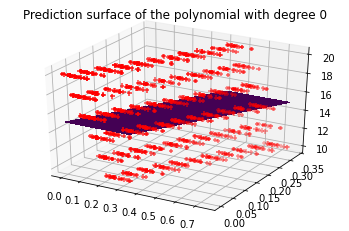

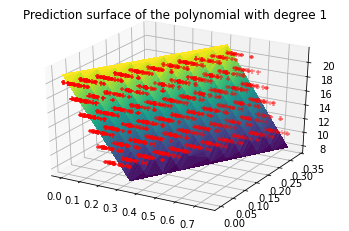

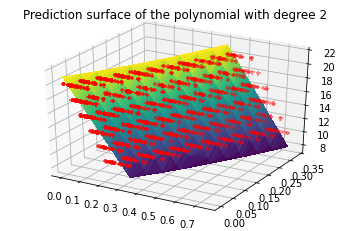

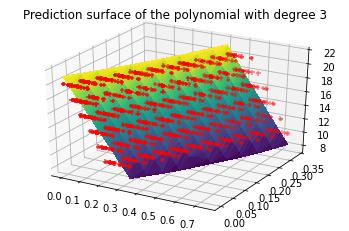

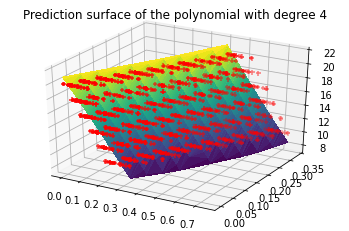

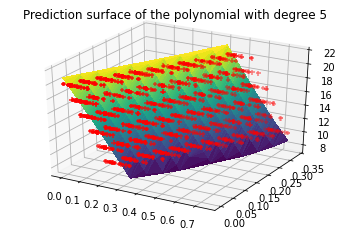

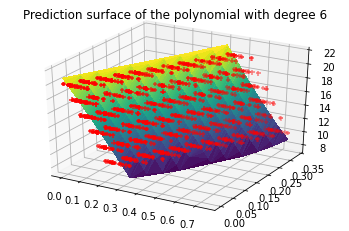

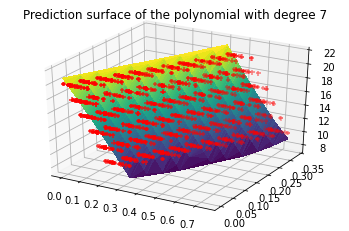

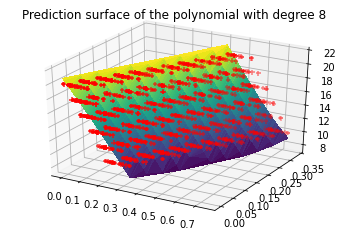

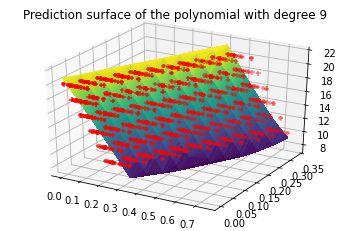

In [ ]:
for degree in range(10):
    ax = plt.figure().gca(projection="3d") 
    x = X_train[:,0]
    y = X_train[:,9] 
    z = np.dot(polynomial(X_train,degree), weights[degree]).flatten()  
    ax.scatter(x, y, y_train.flatten(), color='r', marker='+')
    ax.plot_trisurf(x, y, z, cmap="viridis", antialiased=False)
    ax.set_title('Prediction surface of the polynomial with degree '+str(degree))

### Experimental graphs

In [ ]:
# This will return the polynomial mesh grid for the fiven x1 and x2 meshgrid and degree
def find_mesh(x1, x2, degree):
  return np.dstack((np.power(np.vstack(([x1]*degree,[x2]*degree)), np.tile(np.tile(list(range(1,degree+1))*2, (x.shape[0],1)), (x.shape[1],1,1)).T).T, np.ones((x1.shape[0],x1.shape[1],1))))

In [ ]:
# This will return the polynomial for given x1 and x2 values and degree
def find_exponent(x1,x2,degree):
  return np.hstack((np.power(np.vstack(([x1]*degree,[x2]*degree)), np.tile(list(range(1,degree+1))*2, (x1.shape[0],1)).T).T, np.ones((x1.shape[0],1))))

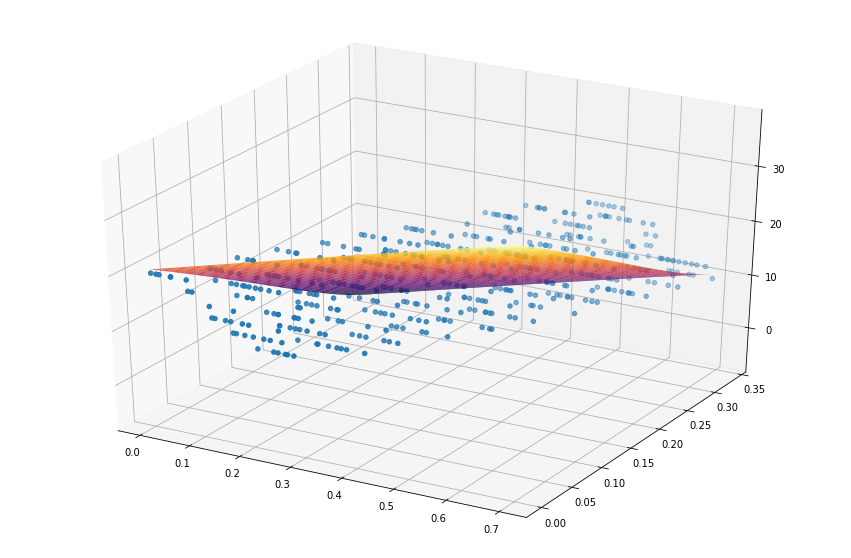

In [ ]:
X = X_test[:,0]

Y = X_test[:,9]

Z = y_test

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z)

n = min(X_test[:,0])
m = max(X_test[:,0])
n1 = min(X_test[:,9])
m1 = max(X_test[:,9])

x = np.linspace(n,m,50)
y = np.linspace(n1,m1,50)
x,y = np.meshgrid(x,y)
z = (find_mesh(x,y,9)@w).reshape(50,50)

ax.plot_surface(x,y,z, cmap="inferno")

plt.show()

In [ ]:
# This is something we tried to do, using a package not mentioned as it gave quite interesting results
x = X_test[:,0]
y = X_test[:,9]
z = find_exponent(x,y,9)@weights[-1]
z1 = y_test
import plotly.express as px
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig1 = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z1.ravel())
fig.show()
fig1.show()

## Regularization

### Gradient descent

#### Ridge regression

In [ ]:
# The cost function for ridge regression
def ridge_cost(yhat,y,lmbda):
     
    J =  (np.sum((yhat - y)**2)+ np.sum(lmbda*w**2))/(2*y.shape[0]) 
     
    return J

In [ ]:
def ridge_regression(X, y, w, learning_rate, lmbda, n_iters):
  J_history = np.zeros((n_iters,1))
 
  for i in range(n_iters):
    J_history[i] = ridge_cost(X@w, y,lmbda)
    w = w - (learning_rate/X.shape[0]) * (X.T @ (X @ w - y)) + (learning_rate/X.shape[0])*lmbda*w 
        
  return (J_history, w)

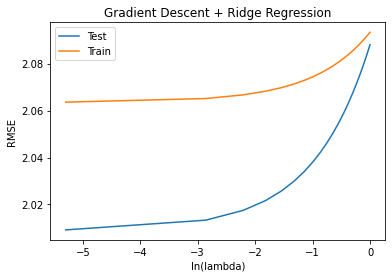

In [ ]:
ssetrain = []  # We will be storing the Error values in this list for the different lambda values
ssetest = []
for lmbda in np.linspace(0.005,1,20):
  xtrain, xtest, w = init_arr(X_train, X_test, 9)
  J_history, w = ridge_regression(xtrain, y_train, w, 0.05,lmbda, 1000)
  ssetrain.append(np.sqrt(ridge_cost(xtrain@w,y_train,lmbda)))
  ssetest.append(np.sqrt(ridge_cost(xtest@w,y_test,lmbda)))

plt.plot(np.log(np.linspace(0.005,1,20)), ssetest)
plt.plot(np.log(np.linspace(0.005,1,20)), ssetrain)
plt.xlabel("ln(lambda)")
plt.ylabel("RMSE")
plt.title('Gradient Descent + Ridge Regression')
plt.legend(['Test','Train'])

#### Lasso regression

In [ ]:
# Lasso regression cost function
def lasso_cost(yhat, y, lmbda):
 
  J =  (np.sum((yhat - y)**2)+ np.sum(lmbda*abs(w)))/(2*y.shape[0])
 
  return J

In [ ]:
# This will return the gradient for the modulus part of our cost function
def prox(lmbda,w):
  w1 = np.where(w>lmbda, w, lmbda)
  w1 = np.where(w<lmbda, w1,-lmbda)
  w1 = np.where(w==lmbda, w1, 0)
  return w1

In [ ]:
def lasso_regression(X, y, w, learning_rate, lmbda, n_iters):
  J_history = np.zeros((n_iters,1))
 
  for i in range(n_iters):
    J_history[i] = lasso_cost(X@w, y,lmbda)
    w = w - (learning_rate/X.shape[0]) * (X.T @ (X @ w - y) + prox(lmbda,w)) 
    
  return (J_history, w)

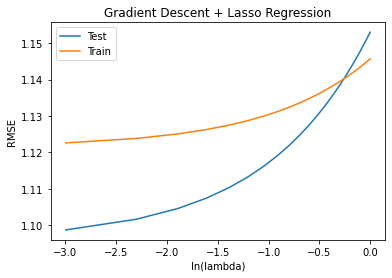

In [ ]:
ssetrain = []
ssetest = []
for lmbda in np.linspace(0.05,1,20):
  xtrain, xtest, w = init_arr(X_train, X_test, 9)
  J_history, w = lasso_regression(xtrain, y_train, w, 1,lmbda, 1000)
  ssetrain.append(np.sqrt(lasso_cost(xtrain@w,y_train,lmbda)))
  ssetest.append(np.sqrt(lasso_cost(xtest@w,y_test,lmbda)))

plt.plot(np.log(np.linspace(0.05,1,20)), ssetest)
plt.plot(np.log(np.linspace(0.05,1,20)), ssetrain)
plt.xlabel("ln(lambda)")
plt.ylabel("RMSE")
plt.title('Gradient Descent + Lasso Regression')
plt.legend(['Test','Train'])

In both cases of regularisation for gradient descent, there is no improvement in the train and test error values. Hence we dont need regularisation in the case of gradient descent for the given dataset.

### Stochastic gradient descent 

#### Ridge regression

In [ ]:
#Stochastic Gradient descent with Ridge Regression
def stochastic_gradient_descent_ridge(X, y, w, learning_rate,lmbda, n_iters):
    J_history = np.zeros((n_iters,1))
    

    for i in range(n_iters):
        for j in range(X.shape[0]):
            ind = np.random.randint(y.shape[0])
            X_stochastic = X[ind].reshape(1,-1)
            y_stochastic = y[ind].reshape(1,-1)
            w = w - (learning_rate/X_stochastic.shape[0]) * (X_stochastic.T @ (X_stochastic @ w - y_stochastic)) + (learning_rate/X_stochastic.shape[0])*lmbda*w 
            
        J_history[i] = ridge_cost(X@w, y, lmbda)
     
    return (J_history, w)

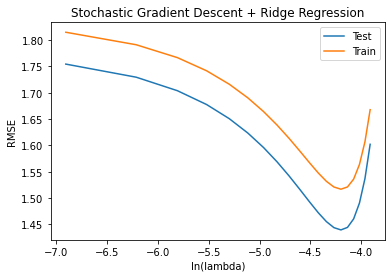

In [ ]:
ssetrain = []
ssetest = []
for lmbda in np.linspace(0.001,0.02,20):
  xtrain, xtest, w = init_arr(X_train, X_test, 9)
  J_history, w = stochastic_gradient_descent_ridge(xtrain, y_train, w, 0.001,lmbda, 100)
  ssetrain.append(np.sqrt(ridge_cost(xtrain@w,y_train,lmbda)))
  ssetest.append(np.sqrt(ridge_cost(xtest@w,y_test,lmbda)))

plt.plot(np.log(np.linspace(0.001,0.02,20)), ssetest)
plt.plot(np.log(np.linspace(0.001,0.02,20)), ssetrain)
plt.xlabel("ln(lambda)")
plt.ylabel("RMSE")
plt.title('Stochastic Gradient Descent + Ridge Regression')
plt.legend(['Test','Train'])

#### Lasso regression

In [ ]:
#Stochastic Gradient descent with Lasso Regression
def stochastic_gradient_descent_lasso(X, y, w, learning_rate,lmbda, n_iters):
    J_history = np.zeros((n_iters,1))
    

    for i in range(n_iters):
        for j in range(X.shape[0]):
            ind = np.random.randint(y.shape[0])
            X_stochastic = X[ind].reshape(1,-1)
            y_stochastic = y[ind].reshape(1,-1)
            w = w - (learning_rate/X_stochastic.shape[0]) * (X_stochastic.T @ (X_stochastic @ w - y_stochastic) + prox(lmbda,w)) 
            
        J_history[i] = lasso_cost(X@w, y, lmbda)

    return (J_history, w)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning:

divide by zero encountered in log



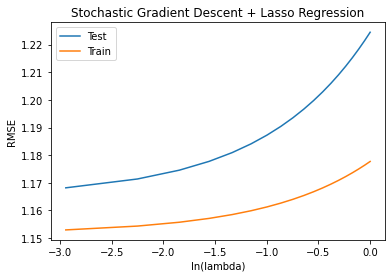

In [ ]:
ssetrain = []
ssetest = []
for lmbda in np.linspace(0,1,20):
  xtrain, xtest, w = init_arr(X_train, X_test, 9)
  J_history, w = stochastic_gradient_descent_lasso(xtrain, y_train, w, 0.1,lmbda, 100)
  ssetrain.append(np.sqrt(lasso_cost(xtrain@w,y_train,lmbda)))
  ssetest.append(np.sqrt(lasso_cost(xtest@w,y_test,lmbda)))

plt.plot(np.log(np.linspace(0,1,20)), ssetest)
plt.plot(np.log(np.linspace(0,1,20)), ssetrain)
plt.xlabel("ln(lambda)")
plt.ylabel("RMSE")
plt.title('Stochastic Gradient Descent + Lasso Regression')
plt.legend(['Test','Train'])